In this assignment students have to make ARIMA model over shampoo sales
data and check the MSE between predicted and actual value.

In [2]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


<ipython-input-2-0ca3698f8655>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [4]:
df = pd.read_csv('shampoo_sales.txt', sep=";", header=0, index_col="Month", parse_dates=True)
df

,Sales
Month,
01-01,266.0
01-02,145.9
01-03,183.1
01-04,119.3
01-05,180.3
01-06,168.5
01-07,231.8
01-08,224.5
01-09,192.8


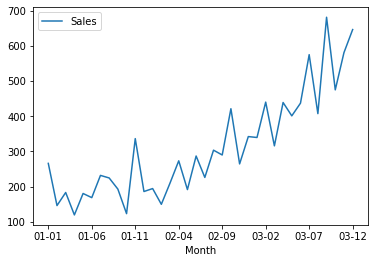

In [5]:
df.plot()
pyplot.show()

In [6]:
X = df.values
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [7]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [8]:
train, test = X[0:size], X[size:len(X)]
print(train.shape)
print(test.shape)

(21, 1)
(15, 1)


In [9]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=272.964480, expected=421.600000
predicted=290.313924, expected=264.500000
predicted=349.117790, expected=342.300000
predicted=306.512880, expected=339.700000
predicted=387.376414, expected=440.400000
predicted=348.154063, expected=315.900000
predicted=386.308839, expected=439.300000
predicted=356.082026, expected=401.300000
predicted=446.379471, expected=437.400000
predicted=394.737308, expected=575.500000
predicted=434.915455, expected=407.600000
predicted=507.923427, expected=682.000000
predicted=435.482855, expected=475.300000
predicted=652.743768, expected=581.300000
predicted=546.343497, expected=646.900000
Test MSE: 7547.806


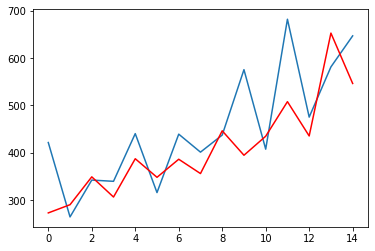

In [10]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()